## 1. Develop programs for following spatial filtering operations on a gray scale image.

## a. Averaging

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [47]:
image = plt.imread("lena8.jpg")

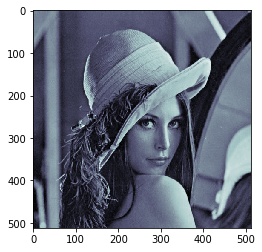

(512, 512)

In [4]:
plt.imshow(image, cmap=plt.cm.bone)
plt.show()
image.shape

In [5]:
row,col = image.shape

In [6]:
def average_filtering(img,mask):
    m,n = mask.shape
    new = np.zeros((row+m-1,col+n-1))             
    
    n = n//2
    m = m//2
    
    res = np.zeros(img.shape)
    
    new[m:new.shape[0]-m,n:new.shape[1]-n] = img     #zero-padded image
    
    for i in range(m, new.shape[0]-m):
        for j in range(n, new.shape[1]-n):
            temp = new[i-m:i+m+1, j-m:j+m+1]
            result = temp*mask
            res[i-m,j-n] = result.sum()
             
    plt.imshow(res, cmap=plt.cm.bone)

#### Window Size: 3X3

In [7]:
mask1 = np.ones((3,3))/9

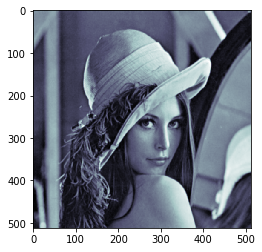

In [8]:
average_filtering(image,mask1)

#### Window Size: 5X5

In [9]:
mask2 = np.ones((5,5))/25

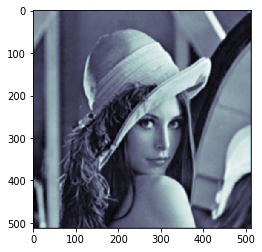

In [10]:
average_filtering(image,mask2)

#### Window Size: 7X7

In [11]:
mask3 = np.ones((7,7))/49

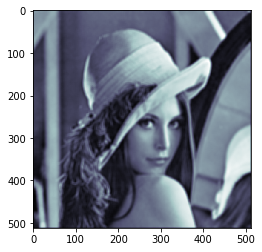

In [12]:
average_filtering(image,mask3)

#### Window Size: 9X9

In [13]:
mask4 = np.ones((9,9))/81

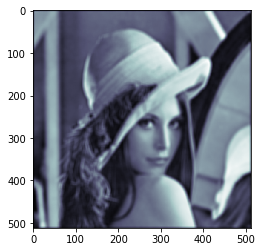

In [14]:
average_filtering(image,mask4)

## b. Weighted averaging

In [15]:
w_mask3 = np.matrix([[1,2,1],[2,4,2],[1,2,1]])/16                  #3X3 Gaussian Filter

In [16]:
w_mask3

matrix([[0.0625, 0.125 , 0.0625],
        [0.125 , 0.25  , 0.125 ],
        [0.0625, 0.125 , 0.0625]])

In [17]:
average_filtering(image, w_mask3)

In [18]:
w_mask5 = np.matrix([[1,4,7,4,1],[4,16,26,16,4],[7,26,41,26,7],[4,16,26,16,4],[1,4,7,4,1]])/273     #5X5 Gaussian Filter

In [19]:
w_mask5

matrix([[0.003663  , 0.01465201, 0.02564103, 0.01465201, 0.003663  ],
        [0.01465201, 0.05860806, 0.0952381 , 0.05860806, 0.01465201],
        [0.02564103, 0.0952381 , 0.15018315, 0.0952381 , 0.02564103],
        [0.01465201, 0.05860806, 0.0952381 , 0.05860806, 0.01465201],
        [0.003663  , 0.01465201, 0.02564103, 0.01465201, 0.003663  ]])

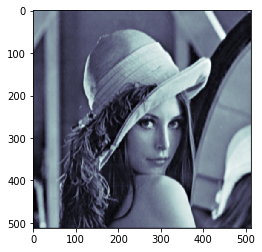

In [20]:
average_filtering(image, w_mask5)

## c. Median filtering

In [21]:
def median_filtering(img,mask):
    m,n = mask.shape
    new = np.zeros((row+m-1,col+n-1))             
    
    n = n//2
    m = m//2
    
    res = np.zeros(img.shape)
    
    new[m:new.shape[0]-m,n:new.shape[1]-n] = img     #zero-padded image
    
    for i in range(m, new.shape[0]-m):
        for j in range(n, new.shape[1]-n):
            temp = new[i-m:i+m+1, j-m:j+m+1]
            result = temp*mask
            res[i-m,j-n] = np.median(result)
             
    plt.imshow(res, cmap=plt.cm.bone)

In [22]:
onemask3 = np.ones((3,3))

median_filtering(image,onemask3)     #3X3 Window Size

In [23]:
onemask5 = np.ones((5,5))

median_filtering(image,onemask5)     #5X5 Window Size

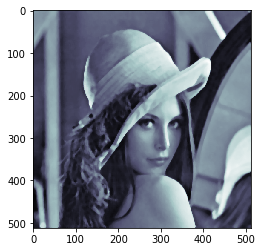

In [24]:
onemask7 = np.ones((7,7))

median_filtering(image,onemask7)     #7X7 Window Size

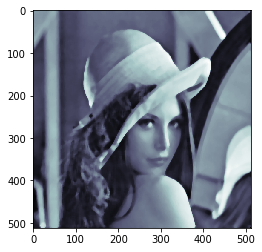

In [25]:
onemask9 = np.ones((9,9))

median_filtering(image,onemask9)     #9X9 Window Size

## d. Max filtering

In [26]:
def max_filtering(img,mask):
    m,n = mask.shape
    new = np.zeros((row+m-1,col+n-1))             
    
    n = n//2
    m = m//2
    
    res = np.zeros(img.shape)
    
    new[m:new.shape[0]-m,n:new.shape[1]-n] = img     #zero-padded image
    
    for i in range(m, new.shape[0]-m):
        for j in range(n, new.shape[1]-n):
            temp = new[i-m:i+m+1, j-m:j+m+1]
            result = temp*mask
            res[i-m,j-n] = np.amax(result)
             
    plt.imshow(res, cmap=plt.cm.bone)

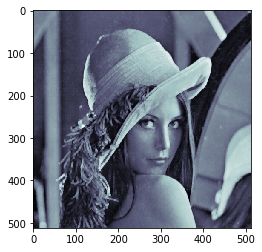

In [27]:
max_filtering(image, onemask3)       #3X3

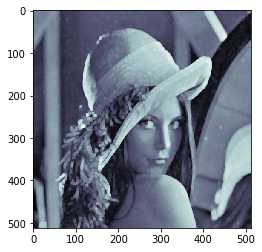

In [28]:
max_filtering(image,onemask5)        #5X5

## e. Min filtering

In [29]:
def min_filtering(img,mask):
    m,n = mask.shape
    new = np.zeros((row+m-1,col+n-1))             
    
    n = n//2
    m = m//2
    
    res = np.zeros(img.shape)
    
    new[m:new.shape[0]-m,n:new.shape[1]-n] = img     #zero-padded image
    
    for i in range(m, new.shape[0]-m):
        for j in range(n, new.shape[1]-n):
            temp = new[i-m:i+m+1, j-m:j+m+1]
            result = temp*mask
            res[i-m,j-n] = np.amin(result)
             
    plt.imshow(res, cmap=plt.cm.bone)

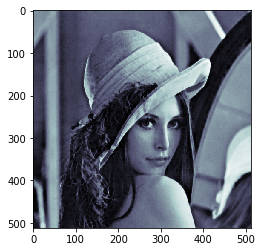

In [30]:
min_filtering(image,onemask3)    #3X3

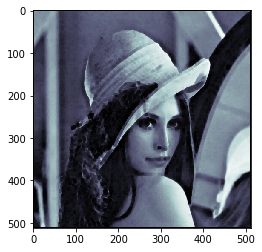

In [31]:
min_filtering(image,onemask5)    #5X5

## 2. Take a gray scale image and add salt and pepper noise. Write programs for following operations and observe their outputs

In [32]:
n_image = plt.imread("lena8.jpg")

In [33]:
import random

sp_image = np.zeros(n_image.shape)
prob = 0.05
thres = 1 - prob

for i in range(n_image.shape[0]):
    for j in range(n_image.shape[1]):
        rdn = random.random()
        if rdn<prob:
            sp_image[i][j]=0
        elif rdn>thres:
            sp_image[i][j] = 255
        else:
            sp_image[i][j] = n_image[i][j]

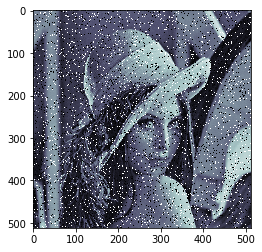

In [34]:
plt.imshow(sp_image, cmap=plt.cm.bone)

## a. Linear smoothing or Image averaging

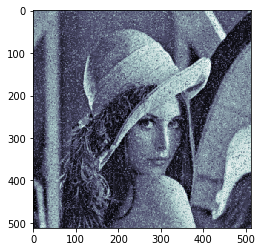

In [35]:
average_filtering(sp_image,mask1)     #3x3

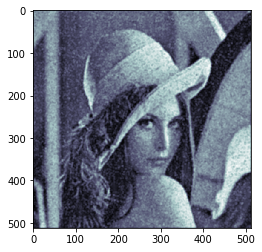

In [36]:
average_filtering(sp_image,mask2)        #5x5

## b. Weighted averaging

In [37]:
average_filtering(sp_image, w_mask3)    #3x3

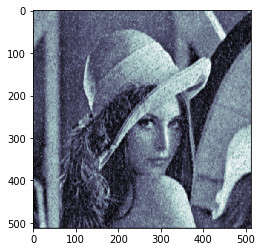

In [38]:
average_filtering(sp_image, w_mask5)    #5x5

## c. Median filtering

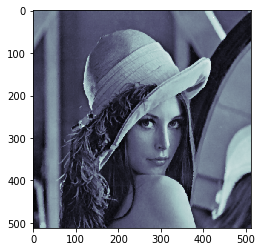

In [39]:
median_filtering(sp_image,onemask3)     #3X3

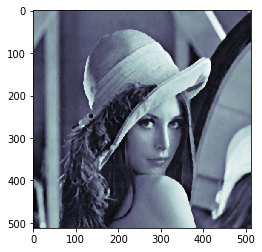

In [40]:
median_filtering(sp_image,onemask5)     #5x5

## d. Max filtering

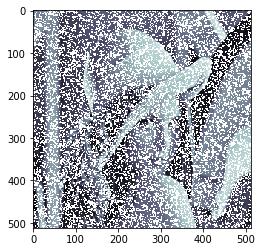

In [41]:
max_filtering(sp_image, onemask3)       #3X3

## e. Min filtering

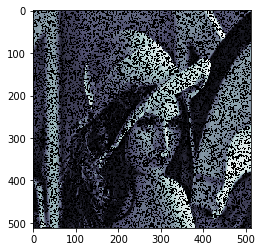

In [42]:
min_filtering(sp_image, onemask3)       #3X3

## 3. Write programs to perform following sharpening operations on a gray scale image

## a. Laplacian filter

In [87]:
lapfil = np.matrix([[0,-1,0],[-1,4,-1],[0,-1,0]])

In [88]:
lapfil

matrix([[ 0, -1,  0],
        [-1,  4, -1],
        [ 0, -1,  0]])

In [89]:
def filtering(img,mask):
    m,n = mask.shape
    new = np.zeros((row+m-1,col+n-1))             
    
    n = n//2
    m = m//2
    
    res = np.zeros(img.shape)
    
    new[m:new.shape[0]-m,n:new.shape[1]-n] = img     #zero-padded image
    
    for i in range(m, new.shape[0]-m):
        for j in range(n, new.shape[1]-n):
            temp = new[i-m:i+m+1, j-m:j+m+1]
            result = temp*mask
            res[i-m,j-n] = result.sum()
             
    return res

In [90]:
blurimg = filtering(image, mask3)

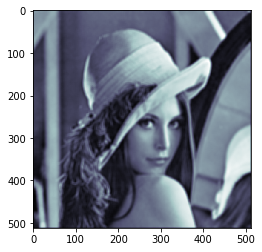

In [91]:
plt.imshow(blurimg, cmap=plt.cm.bone)
print("Blurred Image")

In [92]:
edged = filtering(blurimg, lapfil)

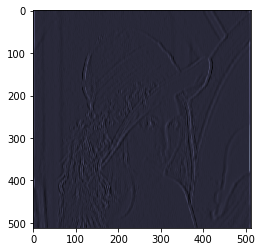

In [93]:
plt.imshow(edged, cmap=plt.cm.bone)

In [94]:
lapimage = blurimg+edged

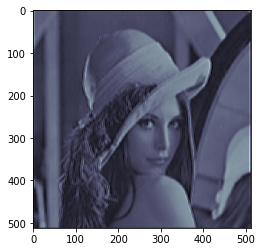

In [95]:
plt.imshow(lapimage, cmap=plt.cm.bone)

In [99]:
scale_lap = lapimage

In [101]:
#Scaling

for i in range(0,lapimage.shape[0]):
    for j in range(0,lapimage.shape[1]):
        if lapimage[i][j]>255:
            #print(d_lapimage[i][j])
            scale_lap[i][j] = lapimage[i][j] - 255

In [102]:
plt.imshow(scale_lap, cmap=plt.cm.bone)

## b. Filtering using composite mask

In [125]:
compimage = blurimg + scale_lap     #adding to the original image

In [127]:
plt.imshow(compimage, cmap=plt.cm.bone)

## c. Unsharp masking

In [133]:
unsharp_mask = np.matrix([[0,-1,0],[-1,5,-1],[0,-1,0]])

In [134]:
unsharp_mask

matrix([[ 0, -1,  0],
        [-1,  5, -1],
        [ 0, -1,  0]])

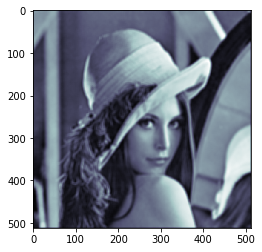

In [135]:
plt.imshow(blurimg, cmap=plt.cm.bone)
print("Blurred Image")

In [136]:
unsharp_edged = filtering(blurimg, unsharp_mask)

In [137]:
plt.imshow(unsharp_edged, cmap=plt.cm.bone)

## d. High boost filtering

In [148]:
hb_mask2 = np.matrix([[0,-1,0],[-1,6,-1],[0,-1,0]])          #hb mask with A = 2
hb_mask3 = np.matrix([[0,-1,0],[-1,7,-1],[0,-1,0]])          #hb mask with A = 3
hb_mask4 = np.matrix([[0,-1,0],[-1,8,-1],[0,-1,0]])          #hb mask with A = 4

Blurred Image


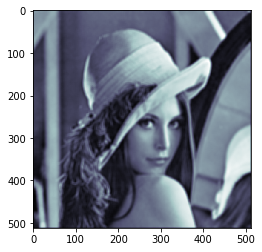

In [152]:
plt.imshow(blurimg, cmap=plt.cm.bone)
print("Blurred Image")

#### A = 2

In [144]:
hb_edged2 = filtering(blurimg, hb_mask2)

In [145]:
plt.imshow(hb_edged2, cmap=plt.cm.bone)

#### A = 3

In [146]:
hb_edged3 = filtering(blurimg, hb_mask3)

In [147]:
plt.imshow(hb_edged3, cmap=plt.cm.bone)

#### A = 4

In [149]:
hb_edged4 = filtering(blurimg, hb_mask4)

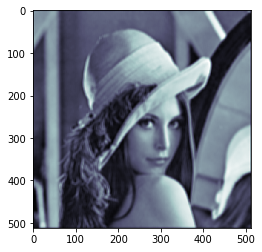

In [150]:
plt.imshow(hb_edged4, cmap=plt.cm.bone)

## e. Filtering using first order derivative operators such as sobel and prewitt mask

### Sobel Mask

In [153]:
sobel = np.matrix([[-1,-2,-1],[0,0,0],[1,2,1]])

Blurred Image


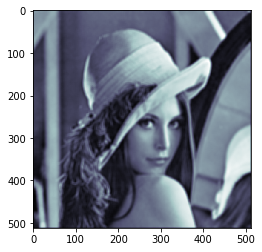

In [155]:
plt.imshow(blurimg, cmap=plt.cm.bone)
print("Blurred Image")

In [156]:
sobel_filter = filtering(blurimg, sobel)

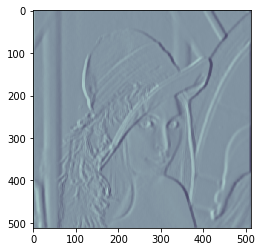

In [157]:
plt.imshow(sobel_filter, cmap=plt.cm.bone)

### Prewitt Mask

In [158]:
prewitt = np.matrix([[-1,-1,-1],[0,0,0],[1,1,1]])

Blurred Image


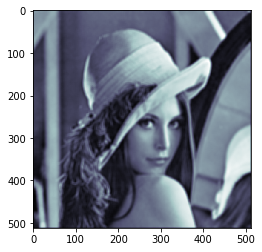

In [159]:
plt.imshow(blurimg, cmap=plt.cm.bone)
print("Blurred Image")

In [160]:
prewitt_filter = filtering(blurimg, prewitt)

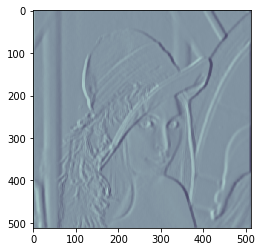

In [161]:
plt.imshow(prewitt_filter, cmap=plt.cm.bone)